<a href="https://colab.research.google.com/github/fattahdm/Capstone_da_WebScrapping/blob/main/projek_analisa_cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


# Gantilah 'nama_file.csv' dengan nama file yang diunggah
df = pd.read_csv("weatherHistory.csv")

# Melihat beberapa baris pertama
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df.info()
df.describe()
df.isnull().sum()  # Cek missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom tanggal dalam format datetime
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])
df["year"] = df["Formatted Date"].dt.year
df["month"] = df["Formatted Date"].dt.month
df["day"] = df["Formatted Date"].dt.day

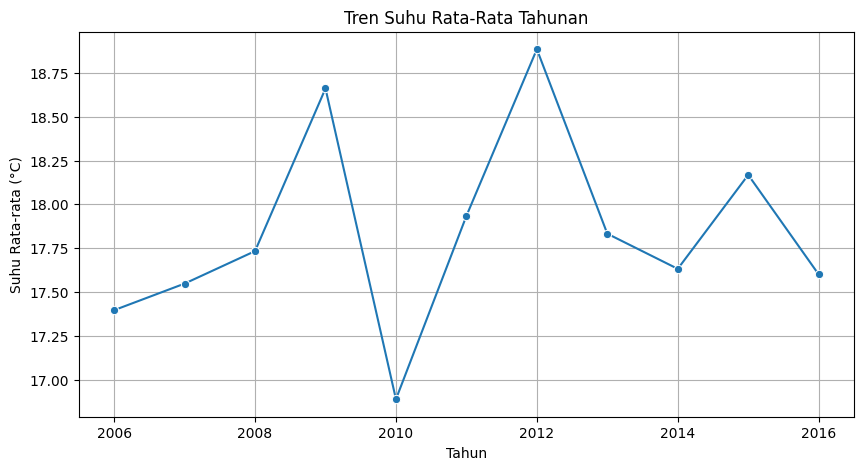

In [ ]:
# Hitung rata-rata suhu per tahun
avg_temp_per_year = df.groupby("year")["Temperature (C)"].mean()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_temp_per_year.index, y=avg_temp_per_year.values, marker="o")
plt.title("Tren Suhu Rata-Rata Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Suhu Rata-rata (°C)")
plt.grid(True)
plt.show()

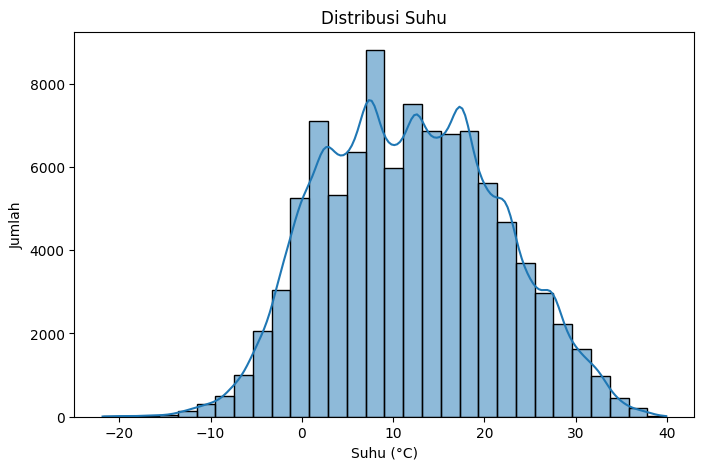

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Temperature (C)"], bins=30, kde=True, stat="count")
plt.title("Distribusi Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah")
plt.show()

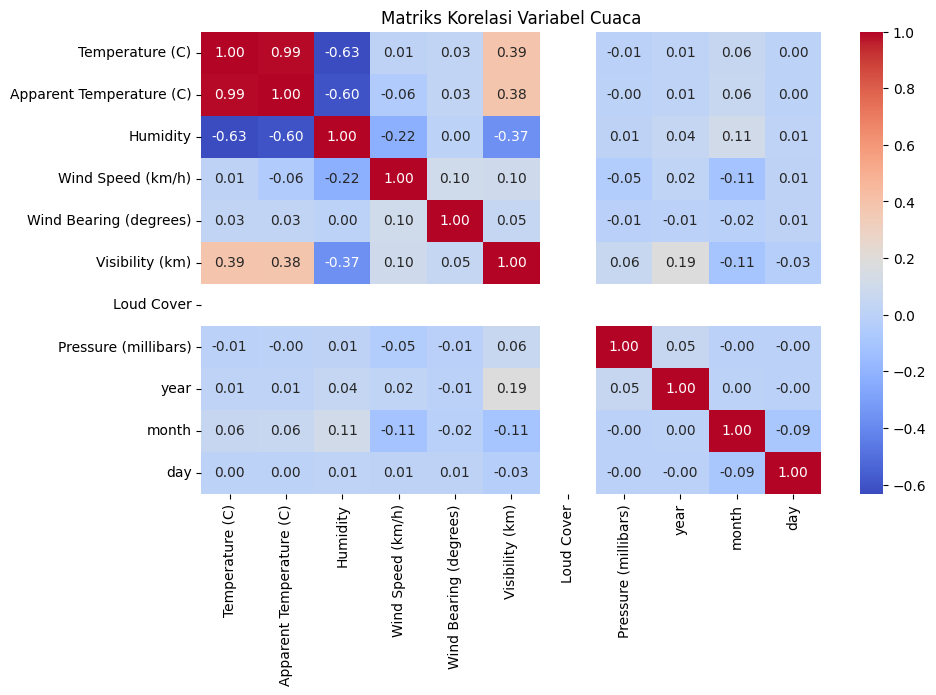

In [ ]:
plt.figure(figsize=(10,6))

# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Buat heatmap korelasi
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matriks Korelasi Variabel Cuaca")
plt.show()

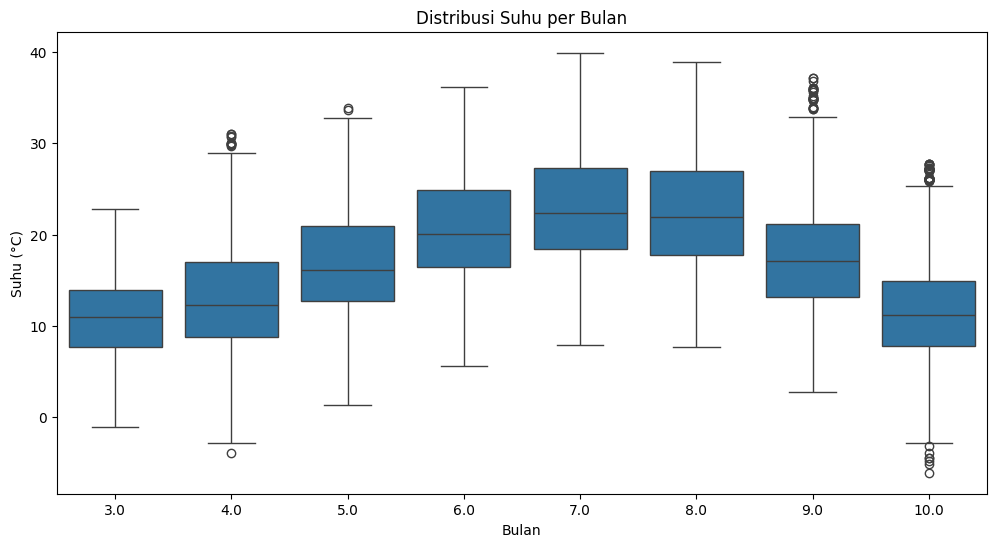

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="Temperature (C)", data=df)
plt.title("Distribusi Suhu per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Suhu (°C)")
plt.show()